# Step 1: Load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import recall_score

## Create a DataFrame

In [2]:
data = datasets.load_iris()
X = data.data       
y = data.target
features_names = data.feature_names
target_names = data.target_names

In [3]:
df = pd.DataFrame(X, columns=data.feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
display(df.head())
print(df)
df.info()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

## Step 2: Explore the data

In [4]:
print('Number of samples per species:')
print(df['species'].value_counts())

Number of samples per species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## Step 3: Split the dataset


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Train the model


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
models ={
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')

DecisionTreeClassifier Accuracy: 1.00
K-Nearest Neighbors Accuracy: 1.00


## Step 5: Evaluate the model

In [7]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}')

Model accuracy: 1.00


## Step 6: Calculate recall score


In [8]:
recall = recall_score(y_test, y_pred, average='macro')
print(f'Model recall: {recall:.2f}')

Model recall: 1.00


## Step 7: Predict with new data


In [9]:
# new_samples = [[5.1, 3.5, 1.4, 0.2], [6.2, 2.8, 4.8, 1.8]]
# predictions = model.predict(new_samples)
# print(f'Predictions for new samples: {predictions}')
new_samples = [[6.2, 2.8, 4.8, 1.8]]
for name, model in models.items():
    predictions = model.predict(new_samples)
    print(f'{name} Predictions for new samples: {target_names[predictions]}')

DecisionTreeClassifier Predictions for new samples: ['virginica']
K-Nearest Neighbors Predictions for new samples: ['virginica']


## Step 8: Visualising data

<Figure size 800x500 with 0 Axes>

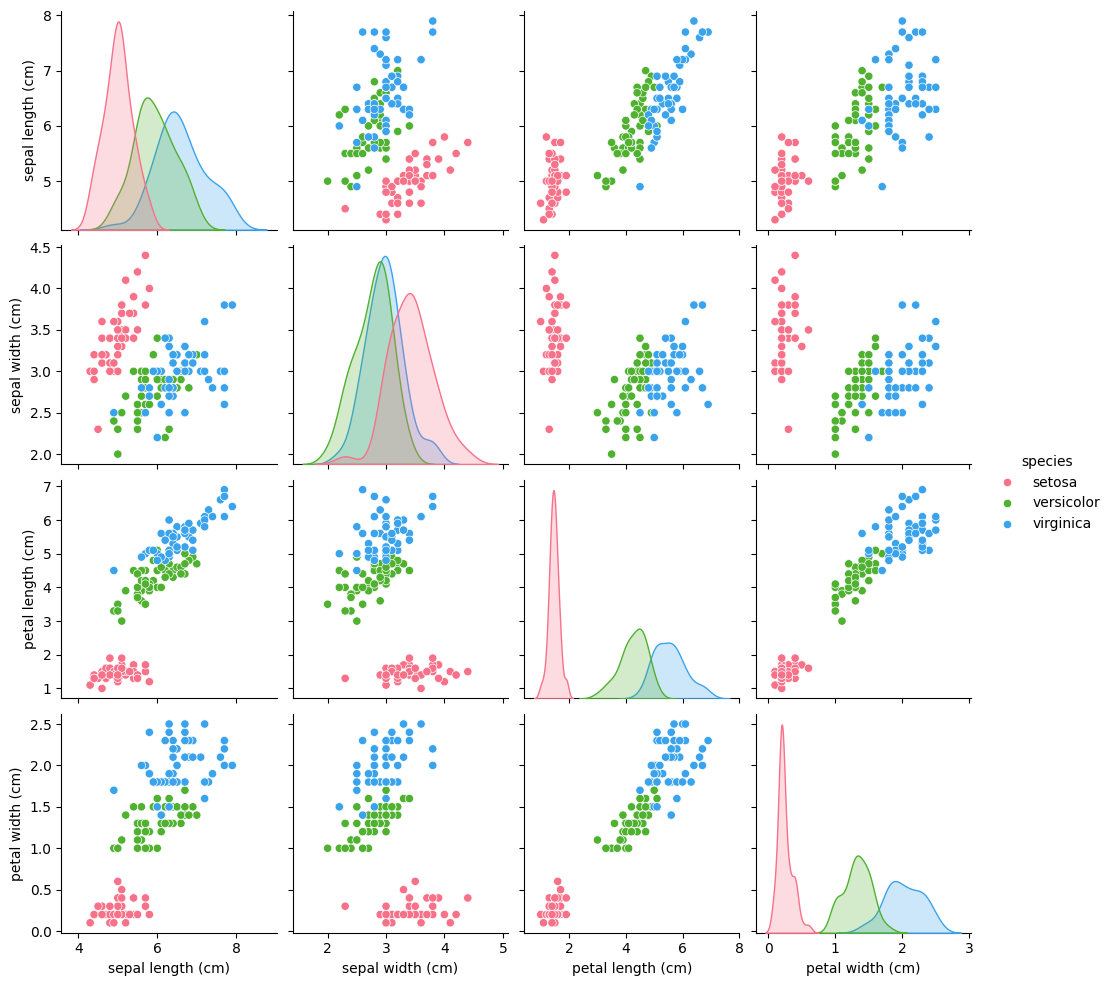

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.pairplot(df, hue='species', palette='husl')
plt.show()

## Estadísticas de resumen

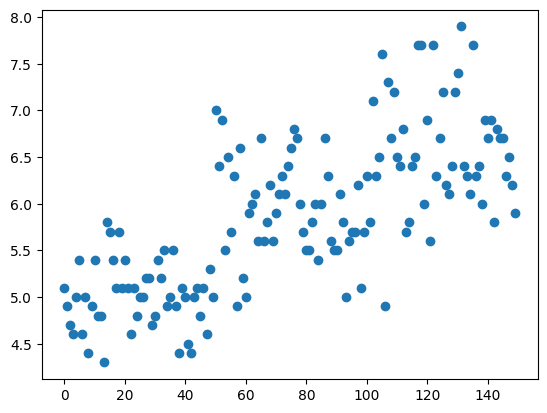

In [11]:
plt.plot(df[data.feature_names[0]], 'o')
plt.show()

In [12]:
df.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Clean emptyn cells 

In [14]:
new_df = df.dropna()

## Delete dublicates

In [15]:
whitout_duplicates = new_df.drop_duplicates()
print(whitout_duplicates)   

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

In [16]:
new_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Comprobacion de outliers de forma visual

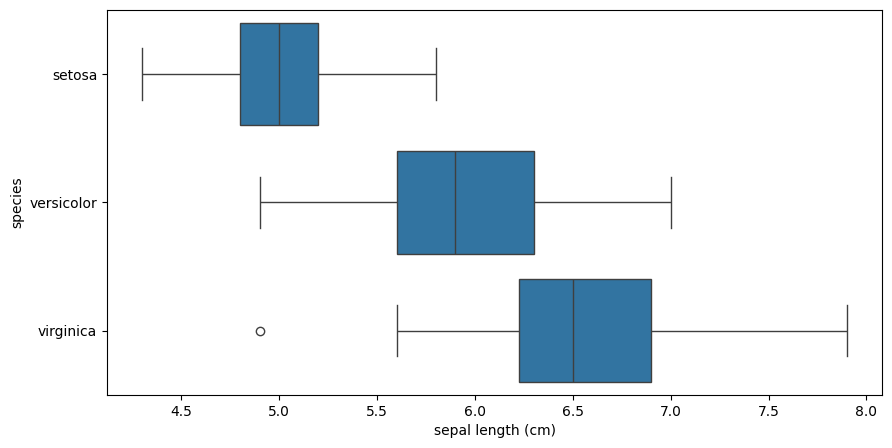

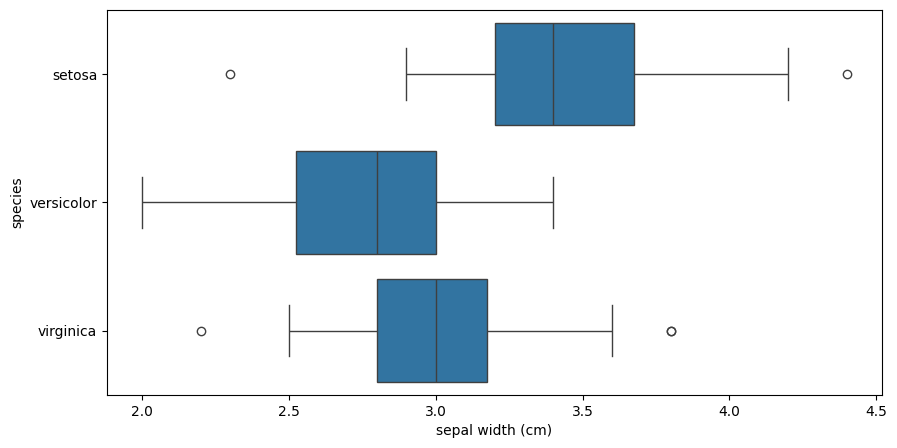

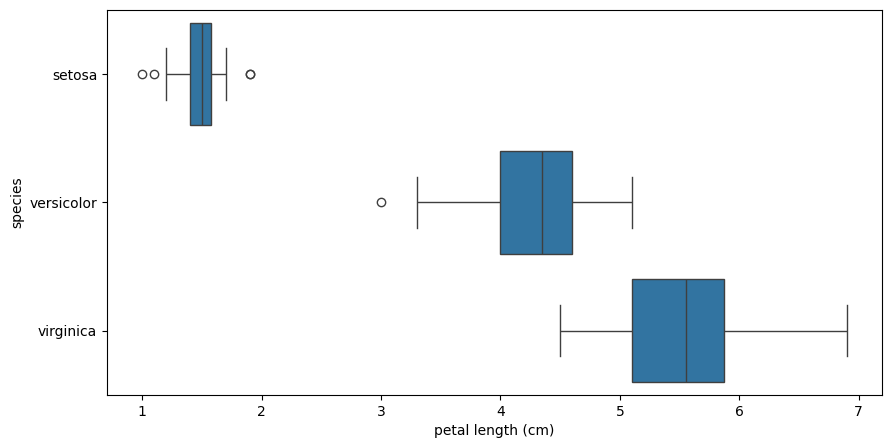

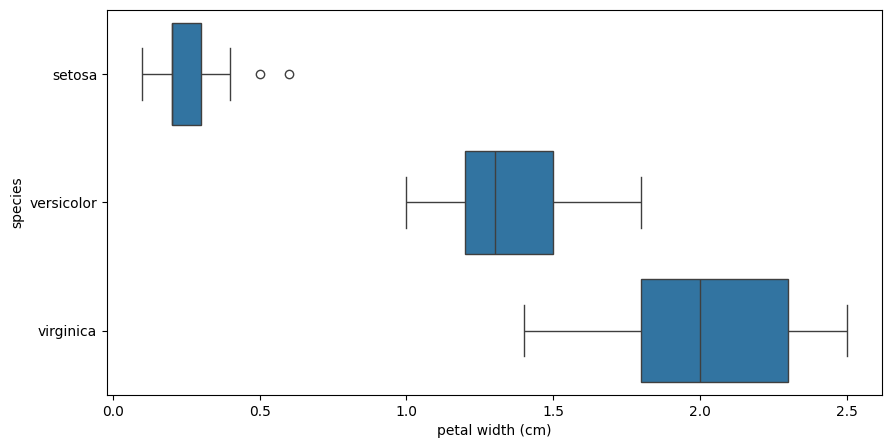

In [17]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[col], y=df['species'], data=df)

<Axes: xlabel='petal length (cm)', ylabel='Count'>

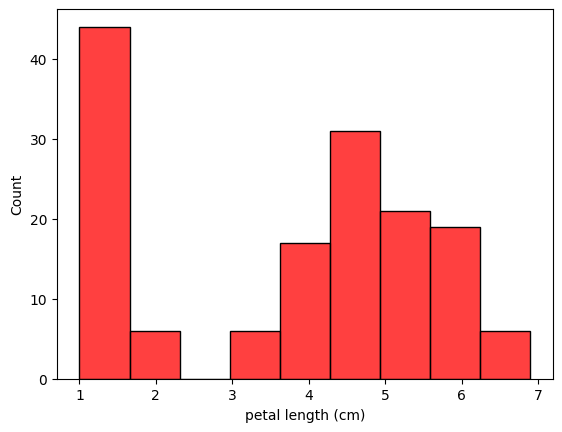

In [18]:
sns.histplot(df['petal length (cm)'], color='red')

### Detecting missing values

In [19]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

### Data info

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Finding median

In [21]:
from sklearn.impute import SimpleImputer
# impute = SimpleImputer(strategy='median')
# df_imputado = pd.DataFrame(impute.fit_transform(df), columns=df.columns)
# print('\nMediana nuevos datos: ',df_imputado.median())